In [2]:
import pandas
import configparser
import psycopg2

In [3]:
config = configparser.ConfigParser()
config.read('config.ini')

host=config['myaws']['host']
db=config['myaws']['db']
user=config['myaws']['user']
pwd=config['myaws']['pwd']

In [4]:
conn = psycopg2.connect(host=host,
                       user=user,
                       password=pwd,
                       dbname=db)

In [5]:
sql = "select * from student"

In [6]:
df=pandas.read_sql_query(sql,conn)

df[:]

,s_email,s_name,major
0,s1@jmu.edu,s1,IA
1,s2@jmu.edu,s2,IA
2,s3@jmu.edu,s3,ISAT
3,s4@jmu.edu,s4,ISAT


In [10]:
sql = """
select professor.p_name, course.c_name 
from professor 
inner join course 
on professor.p_email = course.p_email
"""

In [9]:
df=pandas.read_sql_query(sql,conn)

df[:]

,p_name,c_name
0,p2,mongodb
1,p3,facebook
2,p3,postgresql
3,p3,twitter


In [19]:
sql = """
select count(*) as num_stu, c_number
from enroll
group by c_number

"""

<AxesSubplot:xlabel='c_number'>

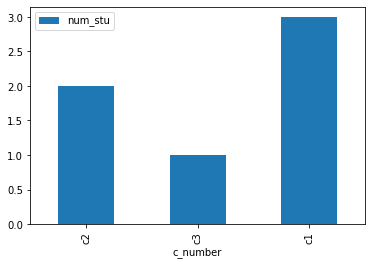

In [22]:
df=pandas.read_sql_query(sql,conn)

df.plot.bar(x='c_number', y='num_stu')

In [25]:
sql = """
select professor.p_name,count(*) as num_course
from professor
inner join course
on professor.p_email = course.p_email
group by professor.p_name

"""

<AxesSubplot:xlabel='p_name'>

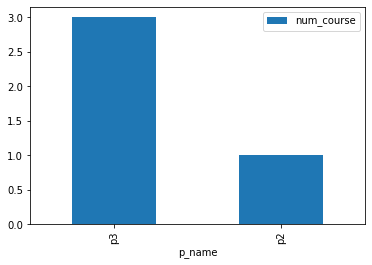

In [28]:
df=pandas.read_sql_query(sql,conn)

df.plot.bar(x='p_name', y='num_course')

In [29]:
sql = """
insert into student(s_email,s_name,major)
values('{}','{}','{}')
""".format('s5@jmu.edu','s5','GS')

print(sql)


insert into student(s_email,s_name,major)
values('s5@jmu.edu','s5','GS')



In [30]:
cur=conn.cursor()

In [31]:
cur.execute(sql)

In [32]:
conn.commit()

In [33]:
df=pandas.read_sql_query('select * from student',conn)

df[:]

,s_email,s_name,major
0,s1@jmu.edu,s1,IA
1,s2@jmu.edu,s2,IA
2,s3@jmu.edu,s3,ISAT
3,s4@jmu.edu,s4,ISAT
4,s5@jmu.edu,s5,GS


In [35]:
sql = """
insert into professor(p_email,p_name,office)
values('{}','{}','{}')
""".format('p4@jmu.edu','p4','o4')

In [35]:
cur=conn.cursor()

In [36]:
cur.execute(sql)

In [37]:
conn.commit()

In [22]:
df=pandas.read_sql_query('select * from professor',conn)

df[:]

,p_email,p_name,office
0,p2@jmu.edu,p2,o2
1,p3@jmu.edu,p3,o3
2,p4@jmu.edu,p4,o4


In [47]:
sql = """
insert into course(c_number,c_name,room,p_email)
values('{}','{}','{}','{}')
""".format('c5','linkedin','r2','p4@jmu.edu')

In [48]:
cur=conn.cursor()

In [49]:
cur.execute(sql)

UniqueViolation: duplicate key value violates unique constraint "course_pkey"
DETAIL:  Key (c_number)=(c5) already exists.


In [51]:
conn.commit()

In [40]:
df=pandas.read_sql_query('select * from course',conn)

df[:]

,c_number,c_name,room,p_email
0,c4,facebook,r1,p3@jmu.edu
1,c1,postgresql,r1,p3@jmu.edu
2,c3,twitter,r1,p3@jmu.edu
3,c5,linkedin,r2,p4@jmu.edu
4,c2,mongodb,r2,p4@jmu.edu


In [36]:
sql = """
    update course
    set p_email = '{}'
    where p_email = '{}'
""".format('p4@jmu.edu','p2@jmu.edu')

In [37]:
cur.execute(sql)

In [38]:
conn.commit()

In [41]:
df=pandas.read_sql_query('select * from course',conn)

df[:]

,c_number,c_name,room,p_email
0,c4,facebook,r1,p3@jmu.edu
1,c1,postgresql,r1,p3@jmu.edu
2,c3,twitter,r1,p3@jmu.edu
3,c5,linkedin,r2,p4@jmu.edu
4,c2,mongodb,r2,p4@jmu.edu


In [42]:
sql = """
delete from professor
where p_email = '{}'
""".format('p2@jmu.edu')

In [43]:
cur.execute(sql)

In [44]:
conn.commit()

In [56]:
df=pandas.read_sql_query('select * from professor',conn)

df[:]

,p_email,p_name,office
0,p3@jmu.edu,p3,o3
1,p4@jmu.edu,p4,o4


In [27]:
conn.rollback()

In [31]:
conn.commit()

In [39]:
sql = """
insert into course(c_number,c_name,room,p_email)
values('{}','{}','{}','{}')
""".format('c5','linkedin','r2','p4@jmu.edu')

In [40]:
cur.execute(sql)

In [41]:
df=pandas.read_sql_query('select * from course',conn)

df[:]

,c_number,c_name,room,p_email
0,c4,facebook,r1,p3@jmu.edu
1,c1,postgresql,r1,p3@jmu.edu
2,c3,twitter,r1,p3@jmu.edu
3,c2,mongodb,r2,p4@jmu.edu
4,c5,linkedin,r2,p4@jmu.edu
